_This notebook was developed by [Keneth Garcia](https://www.linkedin.com/in/keneth-garcia-a6305b1b9/). Source and license info are on [GitHub](https://github.com/KenethGarcia/ClassiPyGRB)._

# Basic Usage
Results for the Swift/BAT Gamma-Ray Burst (GRBs) on board of The Neil Gehrels Swift Observatory are presented in [this website](https://swift.gsfc.nasa.gov/results/batgrbcat/) (open access).

This notebook summarizes how to use **ClassiPyGRB** to download and visualize data from Swift/BAT. Through this document, we are using the _python3_ implementations from the _ClassiPyGRB_ package. It is necessary to have an internet connection and a _Jupyter Notebook_/_Python 3_ compiler software.

First, we need to import the _SWIFT_ instance of _ClassiPyGRB_ to our notebook:

In [1]:
from ClassiPyGRB import SWIFT

## Changing the Swift GRB binning
There are some cases in which we need to use different data resolutions and binning; handling these situations can be solved in this package by managing the _resolution_ $res$ argument.

Through **ClassiPyGRB**, you can change the _resolution_ variable to $2$, $8$, $16$, $64$, and $256$ ms respectively. Additionally, you can set $res=1000$ for 1s binning and $res=10000$ to use data with a signal-to-noise ratio higher than 5 or 10 s binning (10s data don't have uniform time spacing).

In **ClassiPyGRB**, you have a high level of saving data customization. You can set the following paths:
- $root\_path$ (str): Main path to save data/results from SWIFT. Unique mandatory path to ensure the functionality of SWIFT Class.
- $data\_path$ (str, optional): Path to save data from SWIFT. Defaults to Data folder inside root\_path.
- $original\_data\_path$ (str, optional): Path to save non-manipulated data from SWIFT. Defaults to Original\_Data folder inside data\_path.
- $noise\_data\_path$ (str, optional): Path to save noise-reduced data from SWIFT. Defaults to Noise\_Filtered\_Data folder inside data\_path.
- $results\_path$ (str, optional): Path to save non-manipulated data from SWIFT. Defaults to Results folder inside root\_path.

Moreover, in **ClassiPyGRB**, it is possible to customize the bands selected from Swift/BAT data using the parameter `n_bands`. This parameter consists of an array of integers ranging from 1 to 5, where each integer represents a unique band from Swift. In order, 1 represents the 15-25 keV band, 2 represents the 25-50 keV band, 3 represents the 50-100 keV band, 4 represents the 100-350 keV band, and 5 represents the 15-350 keV band. Therefore, for example, by using $n\_bands=[2, 4]$ **ClassiPyGRB** understands that you would like to work with 25-50 keV and 100-350 keV bands. Setting `n_bands` appropriately can help you to improve the preprocessing time, results of t-SNE, and custom plotting from Swift/BAT.

However, the most simple and easy implementation of **ClassiPyGRB** only uses $root\_path$ as a main folder and saves both data and results in this path:

In [2]:
swift = SWIFT(root_path=r'type-your-path-here', res=64)

**ClassiPyGRB** uses the latest table available in Swift/BAT data to retrieve GRB data:

In [3]:
print(swift.summary_table())

         GRBname  Trig_ID  Trig_time_met               Trig_time_UTC   
0     GRB220715B  1116441  679616711.680  2022-07-15T22:24:42.178080  \
1     GRB220714B  1116221  679499914.048  2022-07-14T13:58:04.554000   
2     GRB220711B  1115766  679256218.176  2022-07-11T18:16:28.698520   
3     GRB220708A  1115156  678947999.296  2022-07-08T04:39:29.839400   
4     GRB220706A  1114937  678816583.744  2022-07-06T16:09:14.296300   
...          ...      ...            ...                         ...   
1522   GRB041220   100433  125276305.920  2004-12-20T22:58:26.599560   
1523  GRB041219C   100380  125181033.000  2004-12-19T20:30:34.000000   
1524  GRB041219B   100368  125163527.319         2004-12-19T15:38:48   
1525  GRB041219A   100307            N/A                         N/A   
1526   GRB041217   100116  124961305.236  2004-12-17T07:28:25.236000   

         RA_ground     DEC_ground Image_position_err     Image_SNR   
0     2.548556e+02  -3.358417e+01       1.066890e+00  2.772984e+0

# ClassiPyGRB

**ClassiPyGRB** is a tool to download, manipulate, visualize, and classify GRBs from Swift/BAT. By default, it provides a fast algorithm to obtain data for any GRB in Swift/BAT at more than 5 binnings, and plot in a single-line any GRB light curve. Additionally, it provides an API design to download, preprocess, and perform Manifold Learning Algorithms in Swift/BAT data.


## 1. Obtain data from Swift/BAT

As a first approach to **ClassiPyGRB**, you can obtain data from any GRB in Swift/BAT using the `obtain_data` instance. This function receives as argument the name of GRB in Swift format **_GRBXXXXXXX_** and returns a Pandas Dataframe containing the Swift/BAT table:

In [4]:
example_GRB = 'GRB211211A'
df = swift.obtain_data(name=example_GRB)
print(df)

       Time(s)  15-25keV  15-25Err  25-50keV  25-50Err  50-100keV  50-100Err   
0     -239.840  0.078047  0.061550 -0.020361  0.040445   0.074011   0.050606  \
1     -239.776  0.014914  0.048172  0.024404  0.055086   0.053970   0.054615   
2     -239.712  0.010289  0.036704  0.019014  0.046279   0.044102   0.045226   
3     -239.648 -0.019367  0.053744  0.045145  0.042705  -0.053710   0.049472   
4     -239.584  0.062506  0.055512  0.019125  0.050595  -0.007212   0.043697   
...        ...       ...       ...       ...       ...        ...        ...   
18778  961.952  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
18779  962.016  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
18780  962.080  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
18781  962.144  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
18782  962.208  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   

       100-350keV  100-350Err  15-350ke

There are 11 columns associated with Swift/BAT data: A column representing the Time since BAT triggered in seconds, five columns with counts in 15-25, 25-50, 50-100, 100-350, 15-350 bands, and its associated errors. All of these columns are at a binning issued by the user.

If you want the GRB data only inside a defined range of values (i.e., $T_{90}$), you can use the `lc_limiter` instance. It receives the GRB name and the limits/duration requested:

In [5]:
df = swift.lc_limiter(name=example_GRB, t=90)  # Limit between T_90
print(df)

      Time(s)  15-25keV  25-50keV  50-100keV  100-350keV
3794    2.976  2.006706  3.679186   3.303767    1.187069
3795    3.040  2.373166  4.886965   5.659907    1.936729
3796    3.104  2.955236  5.338191   6.097563    1.982367
3797    3.168  3.167950  5.220485   6.571241    2.406036
3798    3.232  2.121521  3.472208   3.430167    1.123883
...       ...       ...       ...        ...         ...
4581   53.344  0.501744  0.504406   0.271770    0.041186
4582   53.408  0.434515  0.436855   0.290474    0.049907
4583   53.472  0.398790  0.397566   0.096260    0.008980
4584   53.536  0.470291  0.467709   0.200989    0.082539
4585   53.600  0.339196  0.386055   0.200211    0.038785

[792 rows x 5 columns]


In [6]:
df = swift.lc_limiter(name=example_GRB, limits=[0, 100])  # Limit between 0 s and 100 s after BAT Trigger Time
print(df)

      Time(s)  15-25keV  25-50keV  50-100keV  100-350keV
3748    0.032  1.436601  1.611655   1.232227    0.332155
3749    0.096  0.862148  1.112854   0.410195    0.148318
3750    0.160  0.791080  0.652136   0.238672   -0.063675
3751    0.224  0.232108  0.051594   0.145226   -0.034155
3752    0.288  0.237059  0.046521  -0.036057    0.047555
...       ...       ...       ...        ...         ...
5306   99.744 -0.014277  0.037886   0.006490   -0.004354
5307   99.808 -0.037544  0.006025  -0.001554   -0.014440
5308   99.872  0.033071  0.027500  -0.021612    0.002257
5309   99.936 -0.002775  0.027626   0.016930    0.018132
5310  100.000  0.037329 -0.035971   0.014762    0.022669

[1563 rows x 5 columns]


## 2. Visualize data from Swift/BAT

**ClassiPyGRB** also allows to plot and visualize data from Swift/BAT in a single line code using the `plot_any_grb` instance. It receives as arguments the GRB Name and the limits of the plot if requested: Duration interval $T_i$ (50, 90, or 100) (defined as the time interval during which t% of the total observed counts have been detected) or custom limits $[t_i, t_f]$. Then, it returns the Matplotlib axis object associated with the figure. Let's see how the example GRB looks like:

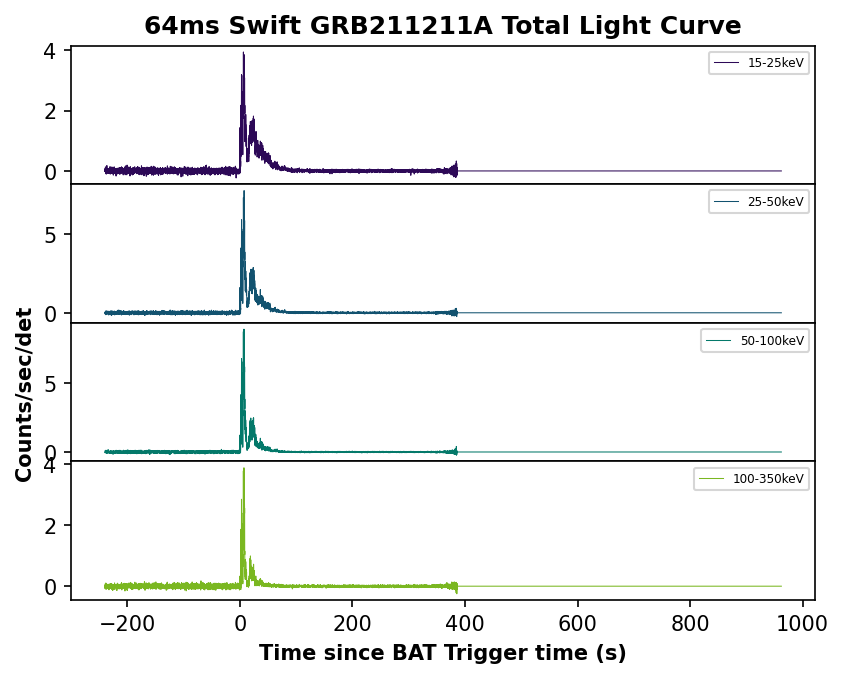

In [7]:
%matplotlib inline
axes_1 = swift.plot_any_grb(name=example_GRB)

## 2.1 Band selection

**ClassiPyGRB** allows by default to work with all the bands of Swift/BAT: 15-25 keV, 25-50 keV, 50-100 keV, and 100-350 keV. However, you can customize the band selection using the `n_bands` attribute.

This array-like uses a format between 1 and 5 to indicate which bands you want to use: In order, 1 represents the 15-25 keV band, 2 represents the 25-50 keV band, 3 represents the 50-100 keV band, 4 represents the 100-350 keV band, and 5 represents the 15-350 keV band (this is the overall sum of the previous bands).

By changing this parameter from `SWIFT` you can customize the level of visualization:

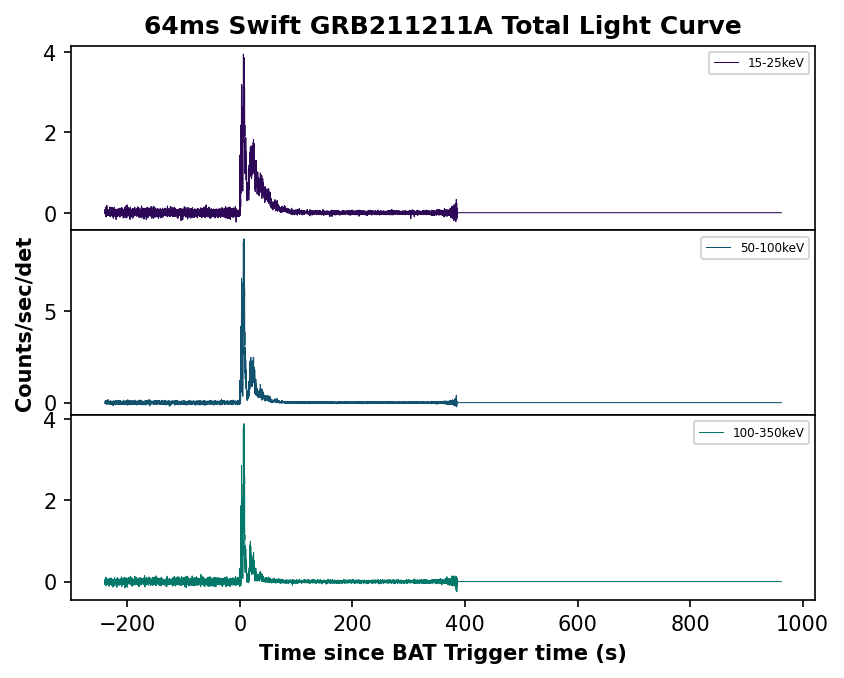

In [8]:
swift = SWIFT(root_path=swift.root_path, res=64, n_bands=[1, 3, 4])  # Selecting 15-25 keV, 50-100 keV and 100-350 keV bands
axes_2 = swift.plot_any_grb(name=example_GRB)

## 2.2 Further customizations
You can also customize the figure format and limit data plotted at any moment. You can use the following formats to plot:

- Interpolated: It changes the plot to background-gray scaled, intended to be used as background for another plot.
- Concatenated: Plot all bands in one single panel.
- Default: Plots each band in one panel.

Additionally, you can send as kwargs any parameter into _matplotlib.pyplot.subplots_ if you use an Interpolated format. Otherwise, any parameter of _matplotlib.pyplot.figure_ to further custom the figure. As example, to limit between $T_{90}$ intervals and using a compressed format:

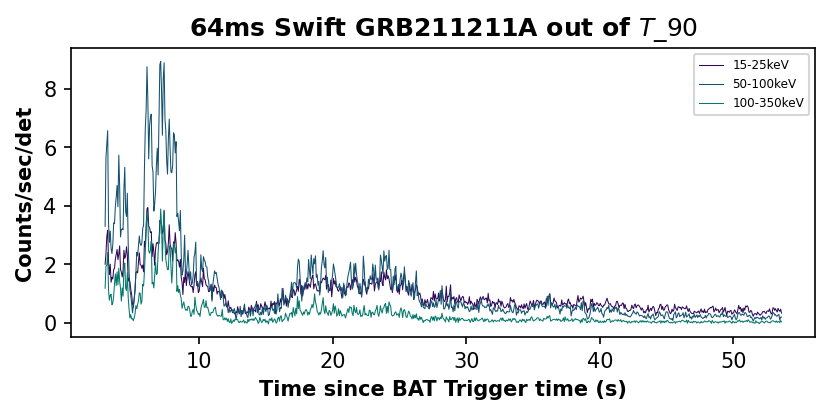

In [9]:
axes_3 = swift.plot_any_grb(name=example_GRB, t=90, kind='concatenated', figsize=[6.4, 2.5])

And, using background gray-scaled format and limiting between $T_{100}$ intervals:

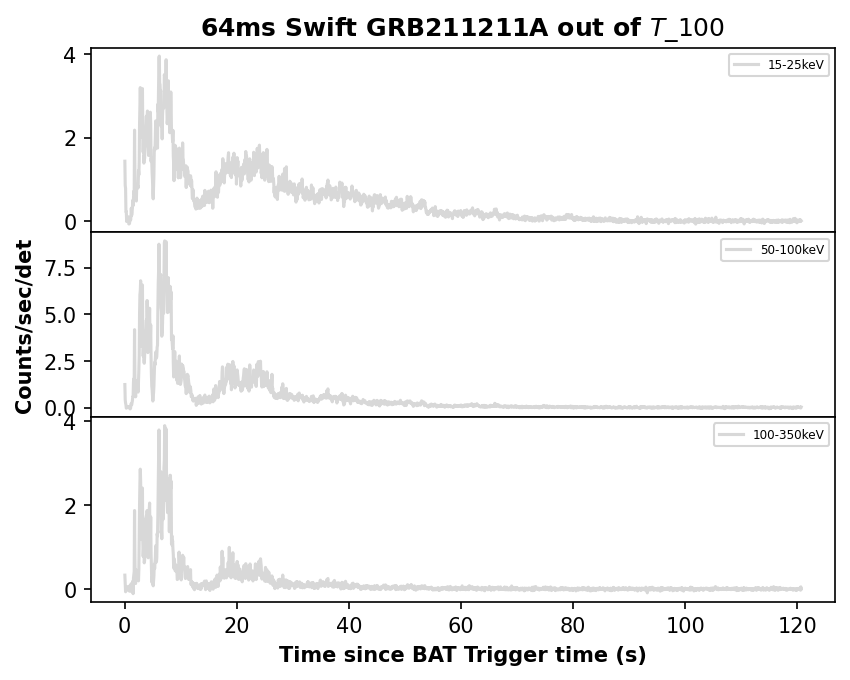

In [10]:
axes_4 = swift.plot_any_grb(name=example_GRB, t=100, kind='interpolated')

Therefore, based on your requirements, **ClassiPyGRB** can help you in an easy and fast way. There are also more sophisticated uses of **ClassiPyGRB**, such as pre-processing, noise-reducing, and classifying methods. If you need further information, you can check the subsequent Jupyter notebooks.